# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Samuel Christian Hamdani
- **Email:** samuelhamdani04@gmail.com
- **ID Dicoding:** samuelhamdani_01

## Menentukan Pertanyaan Bisnis

- Bagaimana perkembangan tingkat polusi udara pada masing-masing kota dari tahun 2013-2017
- Bagaimana perkembangan tingkat polusi dari tahun 2013 - 2017
- Kota mana yang memiliki tingkat polusi udara tertinggi dan terendah? berapa nilainya?

## Import Semua Packages/Library yang Digunakan

In [265]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [266]:
aotizhongxin_df = pd.read_csv("/content/PRSA_Data_Aotizhongxin_20130301-20170228.csv")
changping_df = pd.read_csv("/content/PRSA_Data_Changping_20130301-20170228.csv")
dingling_df = pd.read_csv("/content/PRSA_Data_Dingling_20130301-20170228.csv")
dongsi_df = pd.read_csv("/content/PRSA_Data_Dongsi_20130301-20170228.csv")
guanyuan_df = pd.read_csv("/content/PRSA_Data_Guanyuan_20130301-20170228.csv")
gucheng_df = pd.read_csv("/content/PRSA_Data_Gucheng_20130301-20170228.csv")
huairou_df = pd.read_csv("/content/PRSA_Data_Huairou_20130301-20170228.csv")
nongzhanguan_df = pd.read_csv("/content/PRSA_Data_Nongzhanguan_20130301-20170228.csv")
shunyi_df = pd.read_csv("/content/PRSA_Data_Shunyi_20130301-20170228.csv")
tiantan_df = pd.read_csv("/content/PRSA_Data_Tiantan_20130301-20170228.csv")
wanliu_df = pd.read_csv("/content/PRSA_Data_Wanliu_20130301-20170228.csv")
wanshouxigong_df = pd.read_csv("/content/PRSA_Data_Wanshouxigong_20130301-20170228.csv")

In [267]:
#china_air_df.index = china_air_df['No']

In [268]:
# china_air_df.drop('No', axis=1, inplace=True)
# china_air_df

**Insight:**
- Dari sumber yang diambil ada sekitar 12 dataset yang menjelaskan mengenai wilayah kualitas udara di stasiun-stasiun yang berbeda, lalu menggabungankannya menjadi satu kesatuan
- Masing - masing dataset menyimpan sejumlah kolom seperti : year,	month,	day,	hour,	PM2.5,	PM10,	SO2,	NO2,	CO,	O3,	TEMP,	PRES,	DEWP,	RAIN,	wd,	WSPM,	dan station

### Assessing Data

Tabel aotizhongxin_df

In [269]:
aotizhongxin_df.isnull().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,925
PM10,718
SO2,935
NO2,1023
CO,1776


In [270]:
aotizhongxin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34139 non-null  float64
 6   PM10     34346 non-null  float64
 7   SO2      34129 non-null  float64
 8   NO2      34041 non-null  float64
 9   CO       33288 non-null  float64
 10  O3       33345 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [271]:
aotizhongxin_df.duplicated().sum()

0

In [272]:
aotizhongxin_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34139.000000,34346.000000,34129.000000,34041.000000,33288.000000,33345.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.773611,110.060391,17.375901,59.305833,1262.945145,56.353358,13.584607,1011.846920,3.123062,0.067421,1.708496
std,10122.249256,1.177213,3.448752,8.800218,6.922285,82.135694,95.223005,22.823017,37.116200,1221.436236,57.916327,11.399097,10.404047,13.688896,0.910056,1.204071
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,3.000000,30.000000,500.000000,8.000000,3.100000,1003.300000,-8.100000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,58.000000,87.000000,9.000000,53.000000,900.000000,42.000000,14.500000,1011.400000,3.800000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,114.000000,155.000000,21.000000,82.000000,1500.000000,82.000000,23.300000,1020.100000,15.600000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,898.000000,984.000000,341.000000,290.000000,10000.000000,423.000000,40.500000,1042.000000,28.500000,72.500000,11.200000


Tabel Changping_df

In [273]:
changping_df.isnull().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,774
PM10,582
SO2,628
NO2,667
CO,1521


In [274]:
changping_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34290 non-null  float64
 6   PM10     34482 non-null  float64
 7   SO2      34436 non-null  float64
 8   NO2      34397 non-null  float64
 9   CO       33543 non-null  float64
 10  O3       34460 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [275]:
changping_df.duplicated().sum()

0

In [276]:
changping_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34290.000000,34482.000000,34436.000000,34397.000000,33543.000000,34460.000000,35011.000000,35014.000000,35011.000000,35013.000000,35021.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,71.099743,94.657871,14.958906,44.182086,1152.301345,57.940003,13.686111,1007.760278,1.505495,0.060366,1.853836
std,10122.249256,1.177213,3.448752,8.800218,6.922285,72.326926,83.441738,20.975331,29.519796,1103.056282,54.316674,11.365313,10.225664,13.822099,0.752899,1.309808
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.847700,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,18.000000,34.000000,2.000000,22.000000,500.000000,15.636600,3.400000,999.300000,-10.200000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,46.000000,72.000000,7.000000,36.000000,800.000000,46.000000,14.700000,1007.400000,1.800000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,100.000000,131.000000,18.000000,60.358200,1400.000000,80.000000,23.300000,1016.000000,14.200000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,882.000000,999.000000,310.000000,226.000000,10000.000000,429.000000,41.400000,1036.500000,27.200000,52.100000,10.000000


Tabel dingling_df

In [277]:
dingling_df.isnull().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,779
PM10,656
SO2,730
NO2,1234
CO,2012


In [278]:
dingling_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34285 non-null  float64
 6   PM10     34408 non-null  float64
 7   SO2      34334 non-null  float64
 8   NO2      33830 non-null  float64
 9   CO       33052 non-null  float64
 10  O3       33850 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [279]:
dingling_df.duplicated().sum()

0

In [280]:
dingling_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34285.000000,34408.000000,34334.000000,33830.000000,33052.000000,33850.000000,35011.000000,35014.000000,35011.000000,35013.000000,35021.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,65.989497,83.739723,11.749650,27.585467,904.896073,68.548371,13.686111,1007.760278,1.505495,0.060366,1.853836
std,10122.249256,1.177213,3.448752,8.800218,6.922285,72.267723,79.541685,15.519259,26.383882,903.306220,53.764424,11.365313,10.225664,13.822099,0.752899,1.309808
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,14.000000,26.000000,2.000000,9.000000,300.000000,31.000000,3.400000,999.300000,-10.200000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,41.000000,60.000000,5.000000,19.000000,600.000000,61.000000,14.700000,1007.400000,1.800000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,93.000000,117.000000,15.000000,38.000000,1200.000000,90.000000,23.300000,1016.000000,14.200000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,881.000000,905.000000,156.000000,205.000000,10000.000000,500.000000,41.400000,1036.500000,27.200000,52.100000,10.000000


Tabel dongsi_df

In [281]:
dongsi_df.isnull().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,750
PM10,553
SO2,663
NO2,1601
CO,3197


In [282]:
dongsi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34314 non-null  float64
 6   PM10     34511 non-null  float64
 7   SO2      34401 non-null  float64
 8   NO2      33463 non-null  float64
 9   CO       31867 non-null  float64
 10  O3       34400 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [283]:
dongsi_df.duplicated().sum()

0

In [284]:
dingling_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34285.000000,34408.000000,34334.000000,33830.000000,33052.000000,33850.000000,35011.000000,35014.000000,35011.000000,35013.000000,35021.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,65.989497,83.739723,11.749650,27.585467,904.896073,68.548371,13.686111,1007.760278,1.505495,0.060366,1.853836
std,10122.249256,1.177213,3.448752,8.800218,6.922285,72.267723,79.541685,15.519259,26.383882,903.306220,53.764424,11.365313,10.225664,13.822099,0.752899,1.309808
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,14.000000,26.000000,2.000000,9.000000,300.000000,31.000000,3.400000,999.300000,-10.200000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,41.000000,60.000000,5.000000,19.000000,600.000000,61.000000,14.700000,1007.400000,1.800000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,93.000000,117.000000,15.000000,38.000000,1200.000000,90.000000,23.300000,1016.000000,14.200000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,881.000000,905.000000,156.000000,205.000000,10000.000000,500.000000,41.400000,1036.500000,27.200000,52.100000,10.000000


Tabel guanyuan_df

In [285]:
guanyuan_df.isnull().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,616
PM10,429
SO2,474
NO2,659
CO,1753


In [286]:
guanyuan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34448 non-null  float64
 6   PM10     34635 non-null  float64
 7   SO2      34590 non-null  float64
 8   NO2      34405 non-null  float64
 9   CO       33311 non-null  float64
 10  O3       33891 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [287]:
guanyuan_df.duplicated().sum()

0

In [288]:
guanyuan_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34448.000000,34635.000000,34590.000000,34405.000000,33311.000000,33891.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.933372,109.023303,17.590941,57.901643,1271.294377,55.795044,13.584607,1011.846920,3.123062,0.067421,1.708496
std,10122.249256,1.177213,3.448752,8.800218,6.922285,80.933497,91.573709,23.600367,35.150857,1164.854945,57.436983,11.399097,10.404047,13.688896,0.910056,1.204071
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,1.000000,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,40.000000,3.000000,31.000000,500.000000,7.000000,3.100000,1003.300000,-8.100000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,89.000000,8.000000,51.000000,900.000000,41.000000,14.500000,1011.400000,3.800000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,115.000000,149.000000,22.000000,78.000000,1600.000000,81.000000,23.300000,1020.100000,15.600000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,680.000000,999.000000,293.000000,270.000000,10000.000000,415.000000,40.500000,1042.000000,28.500000,72.500000,11.200000


Tabel gucheng_df

In [289]:
gucheng_df.isnull().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,646
PM10,381
SO2,507
NO2,668
CO,1401


In [290]:
gucheng_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34418 non-null  float64
 6   PM10     34683 non-null  float64
 7   SO2      34557 non-null  float64
 8   NO2      34396 non-null  float64
 9   CO       33663 non-null  float64
 10  O3       34335 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35013 non-null  float64
 14  RAIN     35021 non-null  float64
 15  wd       34905 non-null  object 
 16  WSPM     35022 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [291]:
gucheng_df.duplicated().sum()

0

In [292]:
gucheng_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34418.000000,34683.000000,34557.000000,34396.000000,33663.000000,34335.000000,35013.000000,35014.000000,35013.000000,35021.000000,35022.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,83.852089,118.861978,15.366162,55.871075,1323.974423,57.694879,13.864524,1008.829592,2.610442,0.064453,1.343310
std,10122.249256,1.177213,3.448752,8.800218,6.922285,82.796445,96.742626,21.204526,36.473860,1208.957772,57.019587,11.292857,10.103256,13.782991,0.838654,1.151064
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-15.600000,984.000000,-34.600000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,24.000000,45.000000,2.000000,26.000000,600.000000,10.000000,3.600000,1000.500000,-8.900000,0.000000,0.600000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,60.000000,99.000000,7.000000,50.000000,900.000000,45.000000,14.800000,1008.500000,3.000000,0.000000,1.000000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,115.750000,167.000000,20.000000,79.000000,1600.000000,83.000000,23.500000,1017.000000,15.300000,0.000000,1.800000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,770.000000,994.000000,500.000000,276.000000,10000.000000,450.000000,41.600000,1038.100000,27.400000,41.900000,12.000000


Tabel huairou_df

In [293]:
huairou_df.isnull().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,953
PM10,777
SO2,980
NO2,1639
CO,1422


In [294]:
huairou_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34111 non-null  float64
 6   PM10     34287 non-null  float64
 7   SO2      34084 non-null  float64
 8   NO2      33425 non-null  float64
 9   CO       33642 non-null  float64
 10  O3       33913 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35011 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35009 non-null  float64
 15  wd       34762 non-null  object 
 16  WSPM     35015 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [295]:
huairou_df.duplicated().sum()

0

In [296]:
huairou_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34111.000000,34287.000000,34084.000000,33425.000000,33642.000000,33913.000000,35013.000000,35011.000000,35011.000000,35009.000000,35015.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,69.626367,91.482690,12.121553,32.497250,1022.554545,59.824713,12.445426,1007.598568,2.238619,0.067940,1.652021
std,10122.249256,1.177213,3.448752,8.800218,6.922285,71.224916,83.289578,18.896912,26.489531,898.738241,54.605746,11.751103,10.022101,14.052541,0.849046,1.199143
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.800000,-43.400000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,17.000000,28.000000,2.000000,12.000000,400.000000,18.000000,2.100000,999.300000,-9.600000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,47.000000,69.000000,4.000000,25.000000,800.000000,49.000000,13.600000,1007.300000,2.700000,0.000000,1.300000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,98.000000,131.000000,14.000000,46.000000,1300.000000,83.000000,22.300000,1015.500000,15.300000,0.000000,2.000000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,762.000000,993.000000,315.000000,231.000000,10000.000000,444.000000,40.300000,1036.500000,29.100000,45.900000,12.900000


Tabel nongzhanguan_df

In [297]:
nongzhanguan_df.isnull().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,628
PM10,440
SO2,446
NO2,692
CO,1206


In [298]:
nongzhanguan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34436 non-null  float64
 6   PM10     34624 non-null  float64
 7   SO2      34618 non-null  float64
 8   NO2      34372 non-null  float64
 9   CO       33858 non-null  float64
 10  O3       34558 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [299]:
nongzhanguan_df.duplicated().sum()

0

In [300]:
nongzhanguan_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34436.000000,34624.000000,34618.000000,34372.000000,33858.000000,34558.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,84.838483,108.991096,18.689242,58.097172,1324.350198,58.534682,13.671490,1012.547419,2.447535,0.064020,1.860785
std,10122.249256,1.177213,3.448752,8.800218,6.922285,86.225344,95.341177,24.280665,36.297740,1245.166124,58.401448,11.458418,10.266059,13.810696,0.786282,1.280368
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.571200,2.000000,100.000000,0.214200,-16.800000,987.100000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,3.000000,29.000000,500.000000,10.000000,3.100000,1004.000000,-8.800000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,85.000000,9.000000,51.000000,900.000000,45.000000,14.600000,1012.200000,3.000000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,116.000000,149.000000,23.000000,80.000000,1600.000000,84.000000,23.500000,1020.900000,15.000000,0.000000,2.400000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,844.000000,995.000000,257.000000,273.000000,10000.000000,390.000000,41.100000,1042.000000,28.800000,46.400000,10.500000


Tabel shunyi_df

In [301]:
shunyi_df.isnull().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,913
PM10,548
SO2,1296
NO2,1365
CO,2178


In [302]:
shunyi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34151 non-null  float64
 6   PM10     34516 non-null  float64
 7   SO2      33768 non-null  float64
 8   NO2      33699 non-null  float64
 9   CO       32886 non-null  float64
 10  O3       33575 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35013 non-null  float64
 13  DEWP     35010 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34581 non-null  object 
 16  WSPM     35020 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [303]:
shunyi_df.duplicated().sum()

0

In [304]:
shunyi_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34151.000000,34516.000000,33768.000000,33699.000000,32886.000000,33575.000000,35013.000000,35013.000000,35010.000000,35013.000000,35020.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.491602,98.737026,13.572039,43.908865,1187.063979,55.201321,13.387969,1013.061938,2.465036,0.061094,1.807533
std,10122.249256,1.177213,3.448752,8.800218,6.922285,81.231739,89.143718,19.572068,30.996828,1156.374102,54.873726,11.483588,10.177339,13.726622,0.761668,1.287817
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,988.000000,-36.000000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,19.000000,31.000000,2.000000,19.000000,400.000000,10.000000,3.000000,1004.700000,-8.800000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,77.000000,5.000000,37.000000,800.000000,43.000000,14.400000,1012.700000,3.100000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,112.000000,138.000000,17.000000,62.000000,1500.000000,77.000000,23.200000,1021.000000,15.100000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,941.000000,999.000000,239.000000,258.000000,10000.000000,351.716400,40.600000,1042.800000,27.500000,37.300000,12.800000


Tabel tiantan_df

In [305]:
tiantan_df.isnull().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,677
PM10,597
SO2,1118
NO2,744
CO,1126


In [306]:
tiantan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34387 non-null  float64
 6   PM10     34467 non-null  float64
 7   SO2      33946 non-null  float64
 8   NO2      34320 non-null  float64
 9   CO       33938 non-null  float64
 10  O3       34221 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [307]:
tiantan_df.duplicated().sum()

0

In [308]:
tiantan_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34387.000000,34467.000000,33946.000000,34320.000000,33938.000000,34221.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.164911,106.363672,14.367615,53.162646,1298.303318,55.984297,13.671490,1012.547419,2.447535,0.064020,1.860785
std,10122.249256,1.177213,3.448752,8.800218,6.922285,80.921384,89.700157,20.144631,31.946224,1170.593297,59.081528,11.458418,10.266059,13.810696,0.786282,1.280368
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.571200,2.000000,100.000000,0.428400,-16.800000,987.100000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,41.000000,3.000000,28.000000,500.000000,8.000000,3.100000,1004.000000,-8.800000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,85.000000,7.000000,47.000000,900.000000,40.000000,14.600000,1012.200000,3.000000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,113.000000,144.000000,17.000000,71.000000,1600.000000,81.000000,23.500000,1020.900000,15.000000,0.000000,2.400000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,821.000000,988.000000,273.000000,241.000000,10000.000000,674.000000,41.100000,1042.000000,28.800000,46.400000,10.500000


Tabel wanliu_df

In [309]:
wanliu_df.isnull().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,382
PM10,284
SO2,575
NO2,1070
CO,1812


In [310]:
wanliu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34682 non-null  float64
 6   PM10     34780 non-null  float64
 7   SO2      34489 non-null  float64
 8   NO2      33994 non-null  float64
 9   CO       33252 non-null  float64
 10  O3       32957 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34941 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [311]:
wanliu_df.duplicated().sum()

0

In [312]:
wanliu_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34682.000000,34780.000000,34489.000000,33994.000000,33252.000000,32957.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,83.374716,110.464618,18.376481,65.258789,1319.353513,48.873614,13.428865,1011.097536,3.266588,0.068263,1.501215
std,10122.249256,1.177213,3.448752,8.800218,6.922285,81.905568,92.795065,22.609648,37.996088,1268.114331,55.111740,11.346931,10.355247,13.678060,0.896726,1.104472
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.642400,100.000000,0.214200,-15.800000,985.900000,-34.900000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,40.000000,4.000000,36.000000,500.000000,4.000000,3.200000,1002.500000,-8.100000,0.000000,0.800000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,88.000000,10.000000,60.000000,900.000000,32.000000,14.300000,1010.800000,4.000000,0.000000,1.200000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,116.000000,153.000000,23.000000,88.000000,1600.000000,73.000000,22.900000,1019.400000,15.800000,0.000000,2.000000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,957.000000,951.000000,282.000000,264.000000,10000.000000,364.000000,40.500000,1040.300000,28.500000,72.500000,11.200000


Tabel wanshouxigong_df

In [313]:
wanshouxigong_df.isnull().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,696
PM10,484
SO2,669
NO2,754
CO,1297


In [314]:
wanshouxigong_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34368 non-null  float64
 6   PM10     34580 non-null  float64
 7   SO2      34395 non-null  float64
 8   NO2      34310 non-null  float64
 9   CO       33767 non-null  float64
 10  O3       33986 non-null  float64
 11  TEMP     35045 non-null  float64
 12  PRES     35045 non-null  float64
 13  DEWP     35045 non-null  float64
 14  RAIN     35045 non-null  float64
 15  wd       34985 non-null  object 
 16  WSPM     35051 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


**Insight:**
- Pada setiap tabel, memiliki nilai null yang dimana perlu dibersihkan terlebih dahulu sebelum dibersihkan
- Tidak ada data yang terduplikat pada seluruh tabel sehingga tidak perlu untuk menghapus duplikat
- Seluruh tipe data pada setiap tabel memiliki tipe data yang sama semua

### Cleaning Data

Memberikan nilai "Cannot Be Determined" pada kolom wd di setiap tabel yang bernilai Nan

In [315]:
aotizhongxin_df['wd'].fillna(value="Cannot Be Determined", inplace=True)
changping_df['wd'].fillna(value="Cannot Be Determined", inplace=True)
dingling_df['wd'].fillna(value="Cannot Be Determined", inplace=True)
dongsi_df['wd'].fillna(value="Cannot Be Determined", inplace=True)
guanyuan_df['wd'].fillna(value="Cannot Be Determined", inplace=True)
gucheng_df['wd'].fillna(value="Cannot Be Determined", inplace=True)
huairou_df['wd'].fillna(value="Cannot Be Determined", inplace=True)
nongzhanguan_df['wd'].fillna(value="Cannot Be Determined", inplace=True)
shunyi_df['wd'].fillna(value="Cannot Be Determined", inplace=True)
tiantan_df['wd'].fillna(value="Cannot Be Determined", inplace=True)
wanliu_df['wd'].fillna(value="Cannot Be Determined", inplace=True)
wanshouxigong_df['wd'].fillna(value="Cannot Be Determined", inplace=True)

In [316]:
table = [aotizhongxin_df, changping_df, dingling_df, dongsi_df, guanyuan_df,
       gucheng_df, huairou_df, nongzhanguan_df, shunyi_df, tiantan_df,
       wanliu_df, wanshouxigong_df]

columns = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']

for df in table:
  for col in columns:
    df[col].interpolate(method='linear', inplace=True)


In [317]:
china_air_df = pd.concat([aotizhongxin_df, changping_df, dingling_df, dongsi_df, guanyuan_df, gucheng_df, huairou_df, nongzhanguan_df, shunyi_df, tiantan_df, wanliu_df, wanshouxigong_df], ignore_index=True)
china_air_df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420763,35060,2017,2,28,19,11.0,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Wanshouxigong
420764,35061,2017,2,28,20,13.0,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Wanshouxigong
420765,35062,2017,2,28,21,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.1,Wanshouxigong
420766,35063,2017,2,28,22,12.0,23.0,4.0,30.0,400.0,59.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Wanshouxigong


In [318]:
print(f"jumlah kolom : {china_air_df.shape[1]}") # Mencari jumlah kolom
print(f"jumlah baris : {china_air_df.shape[0]}") # Mencari jumlah baris

jumlah kolom : 18
jumlah baris : 420768


In [319]:
china_air_df.dropna(inplace=True)

In [320]:
print(f"jumlah kolom : {china_air_df.shape[1]}") # Mencari jumlah kolom
print(f"jumlah baris : {china_air_df.shape[0]}") # Mencari jumlah baris

jumlah kolom : 18
jumlah baris : 420746


In [321]:
china_air_df.isnull().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,0
PM10,0
SO2,0
NO2,0
CO,0


In [322]:
china_air_df.drop_duplicates()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420763,35060,2017,2,28,19,11.0,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Wanshouxigong
420764,35061,2017,2,28,20,13.0,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Wanshouxigong
420765,35062,2017,2,28,21,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.1,Wanshouxigong
420766,35063,2017,2,28,22,12.0,23.0,4.0,30.0,400.0,59.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Wanshouxigong


Memberikan Nilai index pada dataset china_air_df

In [323]:
china_air_df.index = china_air_df['No']

Menghapus kolom No pada tabel china_air_df

In [324]:
china_air_df.drop('No', axis=1, inplace=True)
china_air_df

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
No,,,,,,,,,,,,,,,,,
1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35060,2017,2,28,19,11.0,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Wanshouxigong
35061,2017,2,28,20,13.0,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Wanshouxigong
35062,2017,2,28,21,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.1,Wanshouxigong


In [325]:
china_air_df.describe()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,420746.000000,420746.000000,420746.000000,420746.000000,420746.000000,420746.000000,420746.000000,420746.000000,420746.000000,420746.000000,420746.000000,420746.000000,420746.000000,420746.000000,420746.000000
mean,2014.662647,6.523114,15.730407,11.500147,79.843518,104.915012,15.913624,50.601416,1235.708164,57.236595,13.532324,1010.752650,2.483597,0.064432,1.729999
std,1.177167,3.448703,8.799688,6.922206,80.950625,92.431497,21.897053,35.171276,1161.815047,57.136374,11.437812,10.474137,13.797075,0.820660,1.246668
min,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,2014.000000,4.000000,8.000000,6.000000,20.000000,36.000000,3.000000,23.000000,500.000000,10.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000
50%,2015.000000,7.000000,16.000000,12.000000,55.000000,82.000000,7.000000,43.000000,900.000000,44.000000,14.500000,1010.400000,3.000000,0.000000,1.400000
75%,2016.000000,10.000000,23.000000,18.000000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,2.200000
max,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


**Insight:**
- Melakukan pengisian nilai value pada setiap kolom di masing-masing tabel menggunakan metode interpolasi
- Memnghapus sekitar 22 baris yang dimana tidak bisa diberikan nilai

## Exploratory Data Analysis (EDA)

### Explore china_air_df

In [326]:
china_air_df.sample(5)

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
No,,,,,,,,,,,,,,,,,
11780,2014,7,4,19,221.000000,247.0,3.0,27.0,1500.0,192.0,28.9,996.5,22.4,0.0,E,1.6,Dingling
4727,2013,9,13,22,98.000000,58.0,3.0,60.0,1700.0,1.0,19.9,1000.5,19.7,0.1,SW,1.0,Guanyuan
26857,2016,3,24,0,5.000000,5.0,4.0,2.0,300.0,90.0,5.9,1025.2,-13.7,0.0,ENE,0.7,Dingling
17794,2015,3,12,9,92.000000,121.0,46.0,80.0,2200.0,24.0,3.3,1014.0,-12.7,0.0,ENE,2.3,Aotizhongxin
19627,2015,5,27,18,57.545455,83.0,7.0,21.0,700.0,214.0,30.4,998.2,12.3,0.0,S,2.3,Dongsi


Grouping china_air_df menggunakan kolom year dan station

In [327]:
year_station_df = china_air_df.groupby(['year', 'station'])[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']].mean().round(2)
year_station_df

PM2.5    PM10    SO2    NO2       CO     O3   TEMP  \
year station                                                              
2013 Aotizhongxin    82.44  112.94  23.60  63.36  1163.92  47.21  15.50   
     Changping       72.39   91.18  19.13  40.96  1022.98  61.13  15.96   
     Dingling        65.22   78.90  13.96  28.78   940.24  64.54  15.97   
     Dongsi          86.81  104.62  23.71  57.33  1324.75  64.39  15.96   
     Guanyuan        81.65  108.95  21.86  58.87  1132.75  54.12  15.50   
     Gucheng         81.70  112.82  17.54  61.51  1343.21  55.71  15.97   
     Huairou         68.62   98.51  18.30  35.08   988.41  64.26  14.66   
     Nongzhanguan    84.38  103.74  23.24  59.52  1294.82  56.01  15.96   
     Shunyi          75.75   95.15  15.08  41.67  1241.77  55.85  15.54   
     Tiantan         83.21  108.31  18.20  53.17  1311.65  55.16  15.96   
     Wanliu          91.49  112.37  23.62  68.55  1289.63  43.98  15.50   
     Wanshouxigong   83.78  111.20  21.78  55.95  1411.24  52.66  15.85   
2014 Aotizhongxin    89.75  122.28  21.52  63.16  1186.72  48.59  13.88   
     Changping       79.88  107.61  21.25  45.97  1229.97  63.02  14.17   
     Dingling        75.64   91.55  14.87  27.37   890.73  72.76  14.17   
     Dongsi          87.98  117.45  24.21  57.45  1379.93  56.93  13.88   
     Guanyuan        88.53  116.12  23.13  64.34  1362.36  54.68  13.88   
     Gucheng         90.55  134.78  21.29  62.42  1442.16  60.25  14.43   
     Huairou         77.14   99.88  17.58  37.04  1070.98  68.11  12.80   
     Nongzhanguan    92.00  127.22  24.88  62.30  1353.61  59.28  13.88   
     Shunyi          85.19  111.62  17.70  46.83  1173.17  57.90  13.84   
     Tiantan         86.69  114.89  19.77  56.16  1338.59  56.66  13.88   
     Wanliu          90.37  131.28  25.06  75.74  1383.00  40.17  13.88   
     Wanshouxigong   90.48  127.16  23.19  61.80  1442.26  56.44  14.29   
2015 Aotizhongxin    81.83  112.18  14.35  60.94  1436.89  63.60  13.47   
     Changping       68.83   93.28  11.70  42.73  1162.43  58.31  13.57   
     Dingling        64.35   85.37  11.32  26.82   963.93  71.17  13.57   
     Dongsi          87.13  112.12  15.20  50.32  1338.50  55.88  13.43   
     Guanyuan        82.13  106.32  14.07  54.92  1313.70  56.84  13.47   
     Gucheng         83.69  116.37  13.34  49.59  1323.14  60.78  14.03   
     Huairou         70.50   90.17   8.66  28.32  1038.78  60.64  12.41   
     Nongzhanguan    85.18  106.99  15.81  58.25  1382.77  61.37  13.43   
     Shunyi          81.46  100.41  10.45  43.10  1188.41  51.67  13.25   
     Tiantan         82.08  102.86  11.80  52.02  1302.37  60.36  13.43   
     Wanliu          80.23  106.60  14.85  60.06  1327.83  51.62  13.35   
     Wanshouxigong   84.28  111.20  14.38  52.73  1364.23  59.25  13.56   
2016 Aotizhongxin    74.24   94.45  10.83  48.40  1190.22  61.85  13.87   
     Changping       61.67   86.63   8.14  45.54  1129.76  54.00  13.50   
     Dingling        61.70   80.71   7.17  25.38   870.81  75.36  13.50   
     Dongsi          80.18  102.83  11.47  50.63  1236.43  57.58  13.87   
     Guanyuan        77.13  104.93  11.48  53.46  1168.17  54.98  13.87   
     Gucheng         77.44  111.12  10.20  49.78  1170.95  59.52  13.55   
     Huairou         60.92   82.27   6.64  27.28   927.98  53.35  12.41   
     Nongzhanguan    76.10   97.05  11.56  52.54  1209.37  60.22  13.87   
     Shunyi          72.22   88.05   9.57  42.54  1099.95  53.70  13.39   
     Tiantan         73.80   97.27   8.95  49.95  1196.16  55.54  13.87   
     Wanliu          71.43   92.91  10.67  58.26  1232.39  53.18  13.41   
     Wanshouxigong   78.11   98.82  10.64  50.18  1224.08  58.32  13.87   
2017 Aotizhongxin    94.38  106.99  20.83  66.23  1666.45  47.44   0.66   
     Changping       79.80   94.15  16.43  51.01  1535.77  33.01   0.41   
     Dingling        68.28   78.53  13.26  34.27  1157.06  53.82   0.41   
     Dongsi         102.22  131.80  20.36  57.

**Insight:**
- Mengelompokkan dataset menggunakan kolom year dan station agar memudahkan proses visualisasi

## Visualization & Explanatory Analysis

### Pertanyaan 1: Rata-rata tingkat polusi udara di kota beijing per tahun

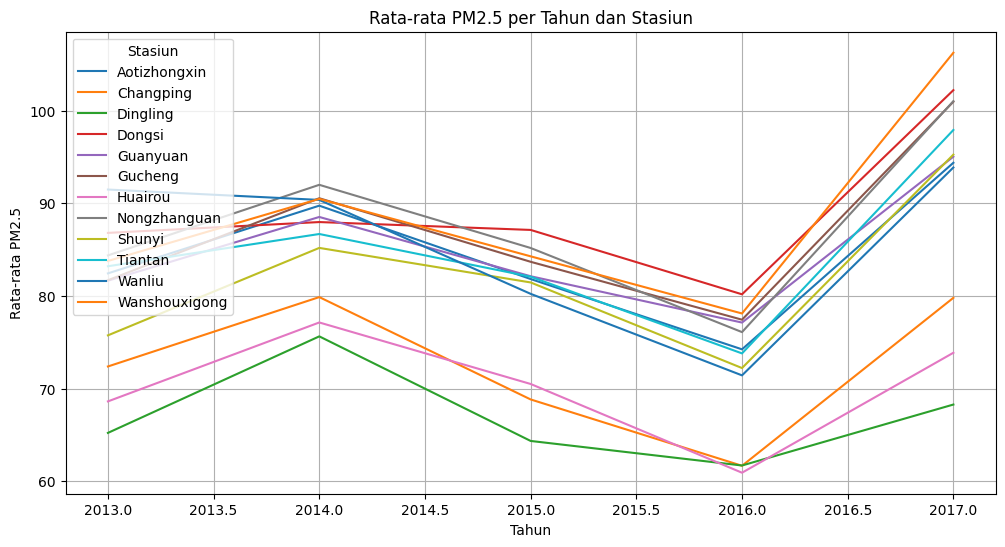

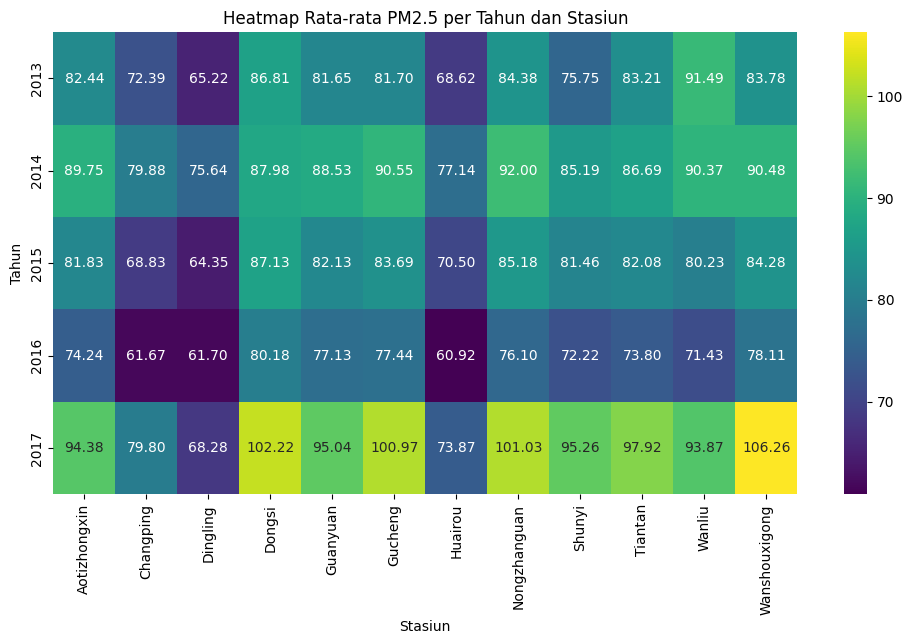

In [332]:
avgpm25_year_station = year_station_df.groupby(['year', 'station'])['PM2.5'].mean().unstack()

# Membuat plot
avgpm25_year_station.plot(kind='line', figsize=(12, 6))
plt.title('Rata-rata PM2.5 per Tahun dan Stasiun')
plt.xlabel('Tahun')
plt.ylabel('Rata-rata PM2.5')
plt.legend(title='Stasiun', loc='upper left')
plt.grid(True)
plt.show()

# Membuat heatmap untuk melihat korelasi antara kota dan tingkat polusi
plt.figure(figsize=(12, 6))
sns.heatmap(avgpm25_year_station, annot=True, cmap='viridis', fmt=".2f")
plt.title('Heatmap Rata-rata PM2.5 per Tahun dan Stasiun')
plt.xlabel('Stasiun')
plt.ylabel('Tahun')
plt.show()


### Pertanyaan 2:  Rata - rata tingkat polusi udara per tahun

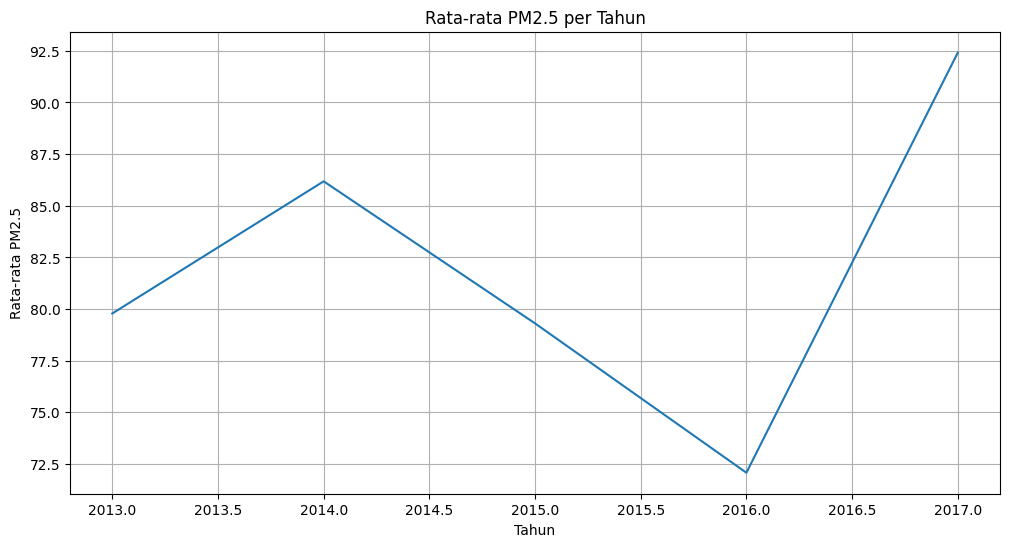

In [329]:
# Mengelompokkan data berdasarkan tahun dan stasiun, kemudian menghitung rata-rata PM2.5
avgpm25_year_station = year_station_df.groupby('year')['PM2.5'].mean()

# Membuat plot
avgpm25_year_station.plot(kind='line', figsize=(12, 6))
plt.title('Rata-rata PM2.5 per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Rata-rata PM2.5')
plt.grid(True)
plt.show()

### Pertanyaan 3. Rata-rata tingkat polusi per kota

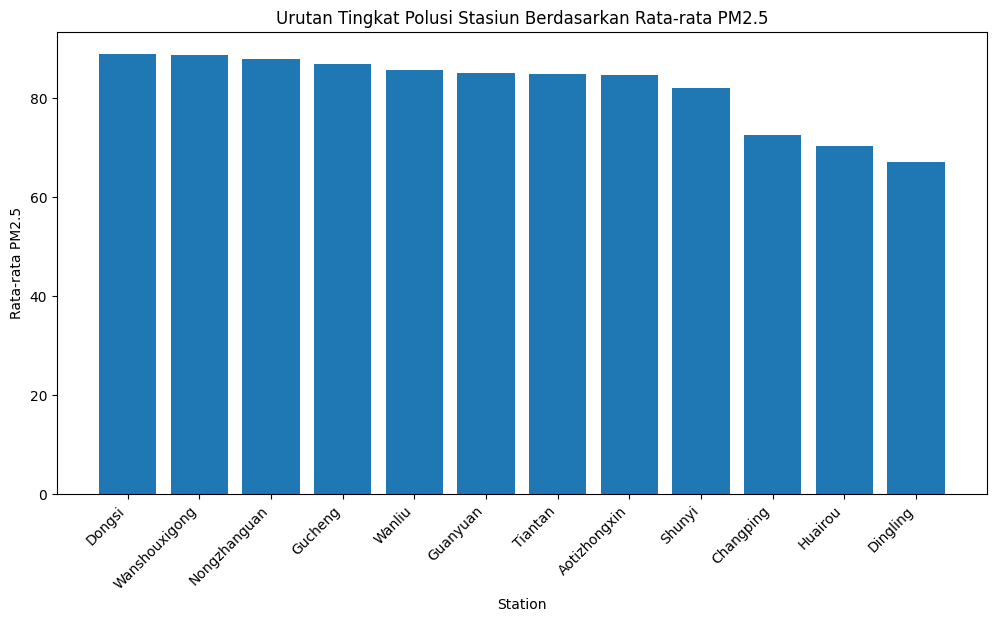

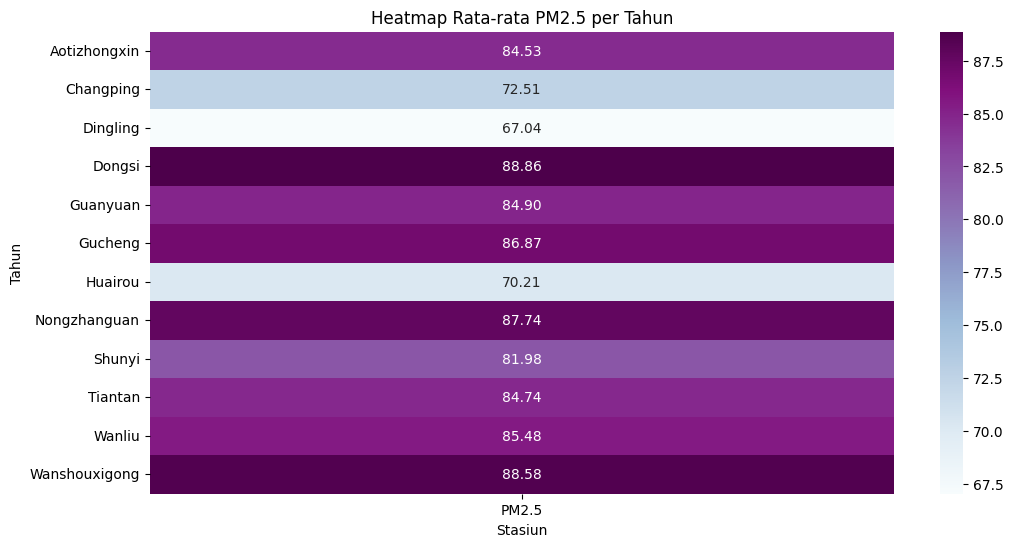

In [330]:
avgpm25_by_station = year_station_df.groupby('station')['PM2.5'].mean().sort_values(ascending=False)

# Membuat bar chart
plt.figure(figsize=(12, 6))
plt.bar(avgpm25_by_station.index, avgpm25_by_station.values)
plt.title('Urutan Tingkat Polusi Stasiun Berdasarkan Rata-rata PM2.5')
plt.xlabel('Station')
plt.ylabel('Rata-rata PM2.5')
plt.xticks(rotation=45, ha='right')
plt.grid(False)
plt.show()

# Membuat heatmap untuk melihat tingkatan polusi udara di masing-masing kota
plt.figure(figsize=(12, 6))
sns.heatmap(year_station_df.groupby('station')['PM2.5'].mean().to_frame(), annot=True, cmap='BuPu', fmt=".2f")
plt.title('Heatmap Rata-rata PM2.5 per Tahun')
plt.xlabel('Stasiun')
plt.ylabel('Tahun')
plt.show()

**Insight:**
- Untuk visualisasi pada pertanyaan pertama, menampilkan visualisasi line chart untuk menampilkan grafik perubahan tingkat polusi per tahun, dan heatmap untuk menunjukkan korelasi antara kota dan tingkat polusi
- Untuk visualisasi pada pertanyaan kedua, menampilkan visualisasi line chart yang menunjukkan perkembangan tingkat polusi udara dari tahun ke tahun
- Untuk visualisasi pada pertanyaan ketiga, menampilkan rata-rata tingkatan polusi di kota-kota beijing, dan menampilkan heat map untuk menampilkan tingkatan nilai polusi udara pada tiap kota

## Conclusion

1. Pada hasil pertanyaan 1, dapat dilihat bahwa tingkat PM2.5 di beberapa stasiun mengalami fluktuasi dari tahun ke tahun. Beberapa stasiun menunjukkan peningkatan atau penurunan yang signifikan dalam tingkat PM2.5 pada tahun-tahun tertentu dan memiliki peningkatan sampai tahun 2017.
2. Pada hasil visualisasi pertanyaan 2, bisa dilihat pada tahun 2014 tingkat polusi di daerah beijing memikliki penaikan, lalu mengalami penurunan yang drastis sampai tahun 2016. Lalu pada pertengahan tahun 2016, mengalami peningkatan yang signifikan sampai ke tahun 2017
3. Pada hasil visualisasi ketiga, disimpulkan bahwa kota yang mempunyai tingkat polusi tertinggi dari tahun 2013- 2017 ialah  kota Gucheng dengan nilai 88.86, dan kota yang memiliki tingkat polusi udara terendah ialah kota Dingling dengan nilai 67.04